# This notebook produces the sentiment bar charts as a function of time 


This notebook will perform the following steps:

1. Read in and process tweets
2. convert tweets into feature vectors
3. Converted tweets are fed into classifiers which then compute the sentiment of the tweets with probabilities
4. A threshold is selected, and tweets with a confidence below this threshold are classified as Neutral. Above this threshold, the sentiments are classified into positive or negative tweets.
5. All tweets are processed and the final graphs are generated


In [1]:
import warnings
import numpy as np

warnings.filterwarnings('ignore')

import collections
import os.path
import sqlite3
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from process_text import clean_up_text
from process_text import preprocess
from process_text import string_cohesion
from process_text import sentiment_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
import pickle
from textblob import TextBlob

#--------------------------------------------------------------
# Import the custom stop words
custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip() )
#--------------------------------------------------------------

#--------------------------------------------------------------
# Import the vocabulary and generate the vectorizer tranformer
#--------------------------------------------------------------
(A,terms,dict_sample) = joblib.load( "/home/javier/Documents/sentiment_analysis/sentiment_model/articles-raw.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )
print('number of terms: ',len(terms))#print(dic_sample[0:10])
print('Dictionary: ',len(dict_sample))

vectorizer = TfidfVectorizer(stop_words = custom_stop_words,min_df = 20)
A = vectorizer.fit_transform(dict_sample)
print('A: ', A.shape)
#--------------------------------------------------------------


#--------------------------------------------------------------
# We load the trained models
#--------------------------------------------------------------
# The names of the files containing the weights of the model
filename1 = 'lr_sentiment_model.sav'
filename2 = 'nb_sentiment_model.sav'

# Now we load in the trained models
loaded_lr = pickle.load(open(filename1, 'rb'))
loaded_nb = pickle.load(open(filename2, 'rb'))
#--------------------------------------------------------------




car_company = "Porsche"

conn = sqlite3.connect('keyword_based_database.db')

q_ford='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
'''

q_toyota='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
'''


q_mercedes='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
'''

q_bmw='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
'''

q_porsche='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
'''

q_tesla='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) LIKE '%model%'
AND LOWER(tweet_text) NOT LIKE '%elon%'
AND LOWER(tweet_text) NOT LIKE '%musk%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND LOWER(tweet_text) NOT LIKE '%stock%'
AND LOWER(tweet_text) NOT LIKE '%production rate%'
AND LOWER(tweet_text) NOT LIKE '%money model%'
AND LOWER(tweet_text) NOT LIKE '%industry%'
AND LOWER(tweet_text) NOT LIKE '%net loss%'
AND LOWER(tweet_text) NOT LIKE '%loss%'
AND LOWER(tweet_text) NOT LIKE '%profit%'
AND LOWER(tweet_text) NOT LIKE '%atari%'
AND LOWER(tweet_text) NOT LIKE '%financial%'
AND LOWER(tweet_text) NOT LIKE '%earn%'
AND LOWER(tweet_text) NOT LIKE '%quarterly%'
AND LOWER(tweet_text) NOT LIKE '%record%'
AND LOWER(tweet_text) NOT LIKE '%market%'
AND LOWER(tweet_text) NOT LIKE '%outsell%'
AND LOWER(tweet_text) NOT LIKE '%produce%'
AND LOWER(tweet_text) NOT LIKE 'second-quarter'
AND LOWER(tweet_text) NOT LIKE 'invest'
'''

q_tesla='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
'''

if(car_company=="Toyota"):
    q = q_toyota
elif(car_company=="Ford"):
    q= q_ford
elif(car_company=="Mercedes"):
    q=q_mercedes
elif(car_company=="BMW"):
    q=q_bmw
elif(car_company=="Porsche"):
    q=q_porsche
elif(car_company=="Tesla"):
    q=q_tesla
    
    
time_stamps = ["'%Aug 02 %'","'%Aug 03 %'","'%Aug 04 %'","'%Aug 05 %'","'%Aug 06 %'","'%Aug 07 %'","'%Aug 08 %'","'%Aug 09 %'","'%Aug 10 %'","'%Aug 11 %'","'%Aug 12 %'","'%Aug 13 %'"]

[nltk_data] Downloading package wordnet to /home/javier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/javier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/javier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Loaded 3500 X 2443 document-term matrix
number of terms:  2443
Dictionary:  8750
A:  (8750, 2443)



SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  795 

Fraction removed:  0.546
Total Sample:  795
Neg/Pos ratio:  0.725

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  491 

Fraction removed:  0.404
Total Sample:  491
Neg/Pos ratio:  0.5969387755102041

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT 

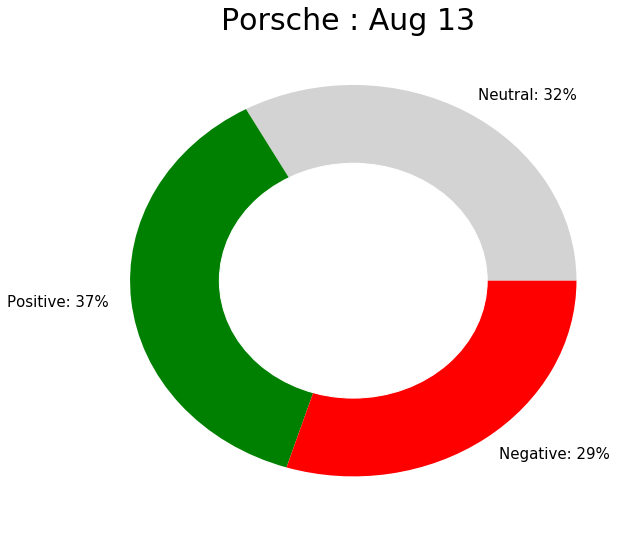

In [2]:
pos_sentiment = []
neg_sentiment = []
neutral_sentiment = []

daily_total = []
daily_neutral=[]
daily_pos=[]
daily_neg=[]

# Loop over all dates that we are looking at
for date in time_stamps:
    
    q_time = q+"AND created_at LIKE "+ date +" \n "
    
    print(q_time)

    df = pd.read_sql_query(q_time,conn)

    N_raw_tweets = len(df)
    
    percents = [-1.0,-1.0,-1.0]
    total_number = -1.0
    
    if(N_raw_tweets != 0):


        # Apply the 'Clean-up-text function to all tweets in the data frame'
        df['tweet_text'] = df['tweet_text'].apply(clean_up_text)


        # Remove duplicate tweets and reset the index
        df.drop_duplicates(subset='tweet_text', keep='first', inplace=True)
        df=df.reset_index(drop=True)

        N_processed_tweets = len(df)

        print('\n')
        print('=============================================================')
        print('The number of tweets after removing duplicates: ', N_processed_tweets ,'\n')
        print('Fraction removed: ', round(1.0-(N_processed_tweets/float(N_raw_tweets)),3) )
        print('=============================================================')


        threshold = 0.2


        sentiment_pred = []
        sentiment_prob = []

        for k in range(0,len(df)):
            sample_text = df['tweet_text'][k]
            pred,prob = sentiment_model(sample_text,threshold,vectorizer, loaded_lr,loaded_nb)
            sentiment_pred.append(pred)
            sentiment_prob.append(prob)

        matplotlib.rcParams['figure.figsize'] = 10, 9
        matplotlib.rcParams['font.size'] = 15

        # Count the various sentiments
        m_count= collections.Counter(sentiment_pred)

        size_model=[m_count[0],m_count[1],m_count[-1]]

        # Compute the total numbers
        total_number = np.sum(size_model)

        # Compute the Percentages
        percents = (np.asarray([m_count[0],m_count[1],m_count[-1]])/total_number)*100.0

        print("Total Sample: ",total_number)
        print("Neg/Pos ratio: ", m_count[-1]/m_count[1])

        # Create a circle for the center of the plot
        my_circle=plt.Circle( (0,0), 0.6, color='white')


        # create data
        names='Neutral: '+str(int(percents[0]))+"%",'Positive: '+str(int(percents[1]))+"%", 'Negative: '+str(int(percents[2]))+"%"

        # Give color names
        plt.clf()
        plt.title(car_company+" : "+date.replace("%", "").replace("'",""),size=30)
        plt.pie(size_model, labels=names, colors=['lightgrey','green','red'])
        p=plt.gcf()
        p.gca().add_artist(my_circle)
        plt.savefig("output/"+car_company+"_"+date.replace("%", "").replace("'","").replace(" ","_")+".pdf",bboxes="tight")
        
    
    # Save the Daily values of positive and negative sentiments
    daily_total.append(total_number)
    daily_neutral.append(percents[0])
    daily_pos.append(percents[1])
    daily_neg.append(percents[2])
    
    
    


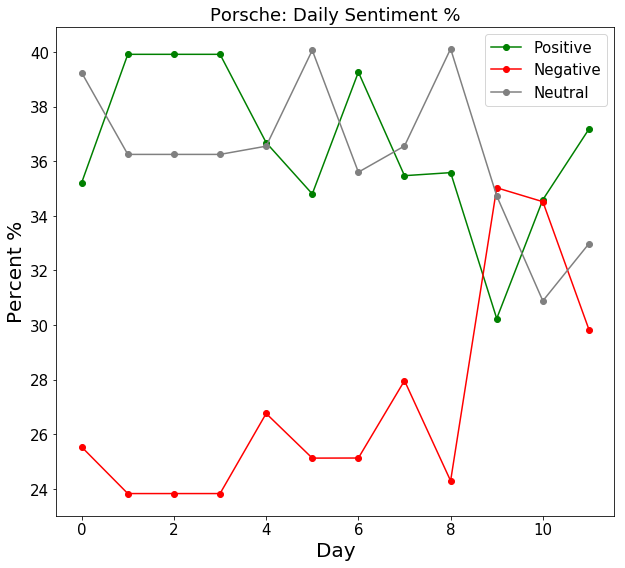

In [3]:
#==========================================================================================================
# Write put all of the Data to a file
filename = "output/"+car_company+"_daily_data.txt"
file = open(filename, "w")

s = "Time_Stamp"+"      "+"Daily_Total "+"       "+"Daily_pos"+"    "+"Daily_neg"+"    "+"Daily_neutral"+"\n"
file.write(s)

for k in range(len(daily_pos)):
    s = time_stamps[k].replace("%", "").replace("'","")+str(daily_total[k])+" "+str(daily_pos[k])+" "+str(daily_neg[k])+" "+str(daily_neutral[k])+"\n"
    file.write(s)
    
file.close()
#==========================================================================================================

#==========================================================================================================
# Fill in Missing Values:

mean_pos = daily_pos[daily_pos!=-1.0].mean()
mean_neg = daily_neg[daily_neg!=-1.0].mean()
mean_neutral = daily_neutral[daily_neutral!=-1.0].mean()

for k in range(len(daily_neg)):
    dpos = daily_pos[k]
    dneg = daily_neg[k]
    dneu = daily_neutral[k]
    
    # replace the missing values with the mean values of the array
    if(dpos==-1.0):
        daily_pos[k] = mean_pos
        daily_neg[k] = mean_neg
        daily_neutral[k] = mean_neutral
    

#==========================================================================================================
# Plot the Data and save the file

plt.title(car_company+": Daily Sentiment %")
plt.xlabel("Day",size=20)
plt.ylabel("Percent %",size=20)
plt.plot(daily_pos,"-o",c="g",label="Positive")
plt.plot(daily_neg,"-o",c="r",label="Negative")
plt.plot(daily_neutral,"-o",c="grey",label="Neutral")
plt.legend()
plt.savefig("output/"+car_company+"_Daily_Sentiment"+".pdf")
plt.show()